# <center>Heart Disease detection</center>

### Aim :
- The main aim of this study is to identify or predict heart disease in an early stage by using previous medical history and general details of the patient. Effectiveness, precision, and accuracy are three important features to consider in predicting heart disease. In this study, I will calculate the accuracy and efficiency of different machine learning model classifiers while predicting heart disease. I am going to use Cleveland Heart Disease Dataset 2016 because it has more features and most used dataset in previous studies.

### Following Steps are included in this notebook :
- Dataset Information
- Exploratory Data Analysis (EDA)
- Summary of EDA
- Modeling
- Conclusion

# <center>Dataset Information</center>

### Import the Necessary Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


### Data Info :

In [3]:
data.shape

(303, 14)

In [150]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             303 non-null    int64  
 1   sex             303 non-null    int64  
 2   cp              303 non-null    int64  
 3   trestbps        303 non-null    int64  
 4   chol            303 non-null    int64  
 5   fbs             303 non-null    int64  
 6   restecg         303 non-null    int64  
 7   thalach         303 non-null    int64  
 8   exang           303 non-null    int64  
 9   oldpeak         303 non-null    float64
 10  slope           303 non-null    int64  
 11  ca              303 non-null    int64  
 12  thal            303 non-null    int64  
 13  target          303 non-null    int64  
 14  trestbps_Group  303 non-null    int64  
 15  chol_Group      303 non-null    int64  
 16  thalach_Group   303 non-null    int64  
 17  oldpeak_Group   303 non-null    int

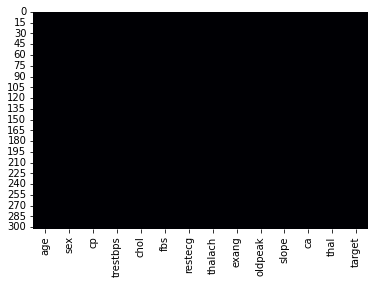

In [152]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

- **No null values** present in the data!

In [154]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.00,54.37,9.08,29.00,47.50,55.00,61.00,77.00
sex,303.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
cp,303.00,0.97,1.03,0.00,0.00,1.00,2.00,3.00
trestbps,303.00,131.62,17.54,94.00,120.00,130.00,140.00,200.00
chol,303.00,246.26,51.83,126.00,211.00,240.00,274.50,564.00
fbs,303.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
restecg,303.00,0.53,0.53,0.00,0.00,1.00,1.00,2.00
thalach,303.00,149.65,22.91,71.00,133.50,153.00,166.00,202.00
exang,303.00,0.33,0.47,0.00,0.00,0.00,1.00,1.00
oldpeak,303.00,1.04,1.16,0.00,0.00,0.80,1.60,6.20


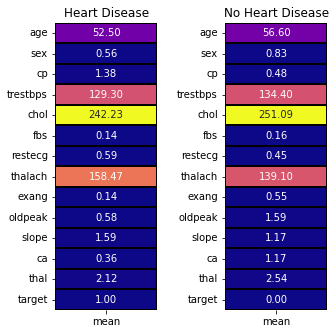

In [7]:
yes = data[data['target'] == 1].describe().T
no = data[data['target'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = 'plasma',linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = 'plasma',linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

- **Mean** values of all the features for cases of heart diseases and non-heart diseases.

# <center>Exploratory Data Analysis</center>

### Dividing features into Numerical and Categorical :

In [8]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : sex cp fbs restecg exang slope ca thal target
Numerical Features : age trestbps chol thalach oldpeak


- Here, categorical features are defined if the the attribute has less than 6 unique elements else it is a numerical feature.
- Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.

**Eg :** datatype = integer, attribute = numerical feature ; datatype = string, attribute = categorical feature

- For this dataset, as the number of features are less, we can manually check the dataset as well.

### Categorical Features :

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['sex'] = le.fit_transform(df1['sex'])
df1['cp'] = le.fit_transform(df1['cp'])
df1['fbs'] = le.fit_transform(df1['cp'])
df1['restecg'] = le.fit_transform(df1['restecg'])
df1['exang'] = le.fit_transform(df1['exang'])
df1['slope'] = le.fit_transform(df1['slope'])
df1['ca'] = le.fit_transform(df1['ca'])
df1['thal'] = le.fit_transform(df1['thal'])

- Creating a deep copy of the orginal dataset and label encoding the text data of the categorical features.
- Modifications in the original dataset will not be highlighted in this deep copy.
- Hence, we use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.

#### Distribution of Categorical Features :

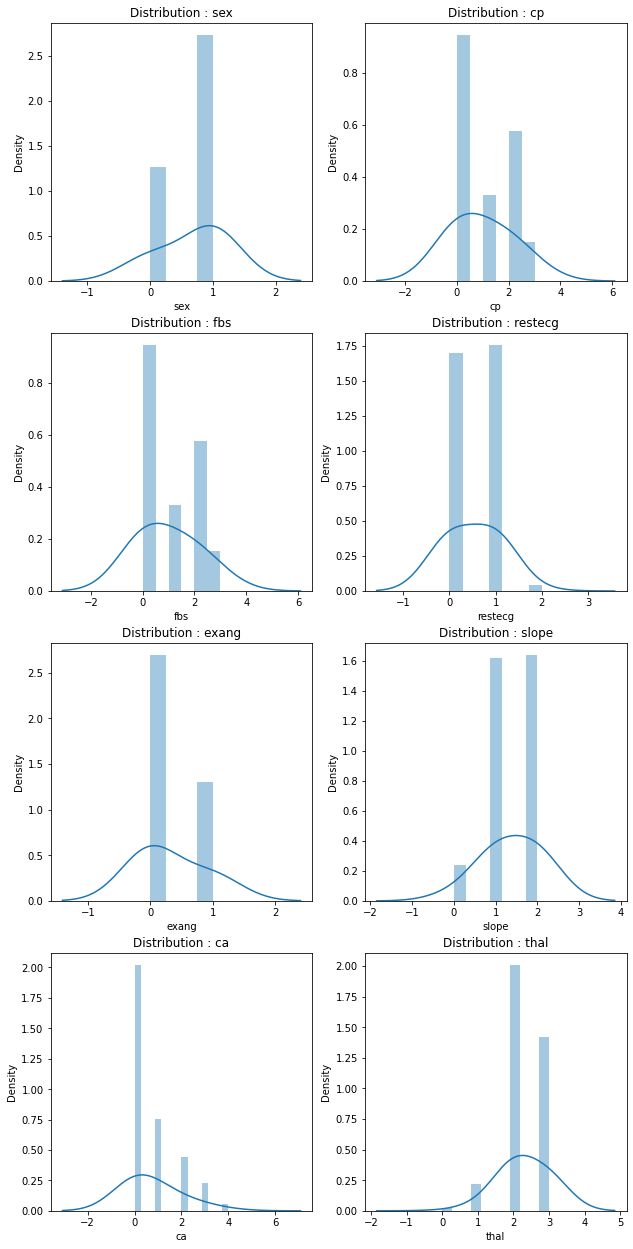

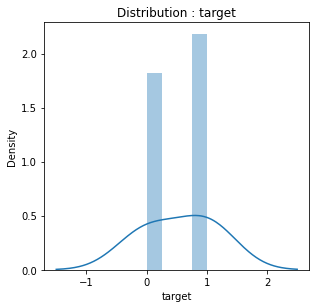

In [69]:
fig, ax = plt.subplots(nrows = 4,ncols = 2,gridspec_kw=dict(left=0.1, right=0.9,
                                        bottom=0.1, top=1.2),figsize = (10,15))
for i in range(len(categorical_features) - 1):
    
    plt.subplot(4,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1});
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
    
plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1})
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);

- All the categorical features are near about **Normally Distributed**.

### Numerical Features :

#### Distribution of Numerical Features :

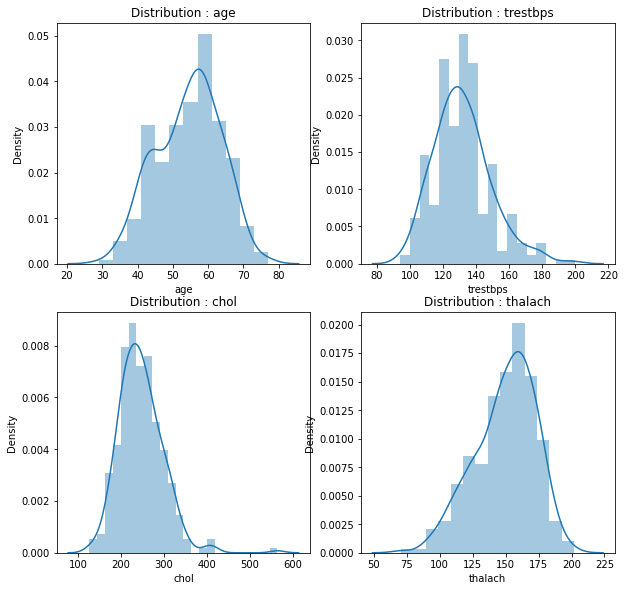

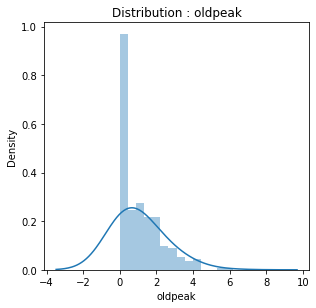

In [11]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(data[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1})
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

- **Oldpeak's** data distribution is rightly skewed.
- **Cholestrol** has a bidmodal data distribution. 

### Target Variable Visualization (HeartDisease) : 

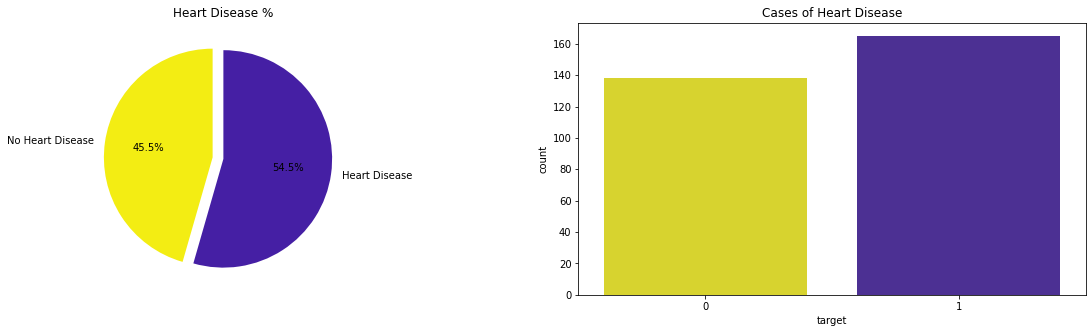

In [12]:
l = list(data['target'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]
colors = ['#F3ED13','#451FA4']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors)
plt.title('Heart Disease %');

plt.subplot(1,2,2)
sns.countplot('target',data = data,palette = colors)
plt.title('Cases of Heart Disease');
plt.show()

- The dataset is pretty much **evenly balanced!**

### Categorical Features vs Target Variable (HeartDisease) :

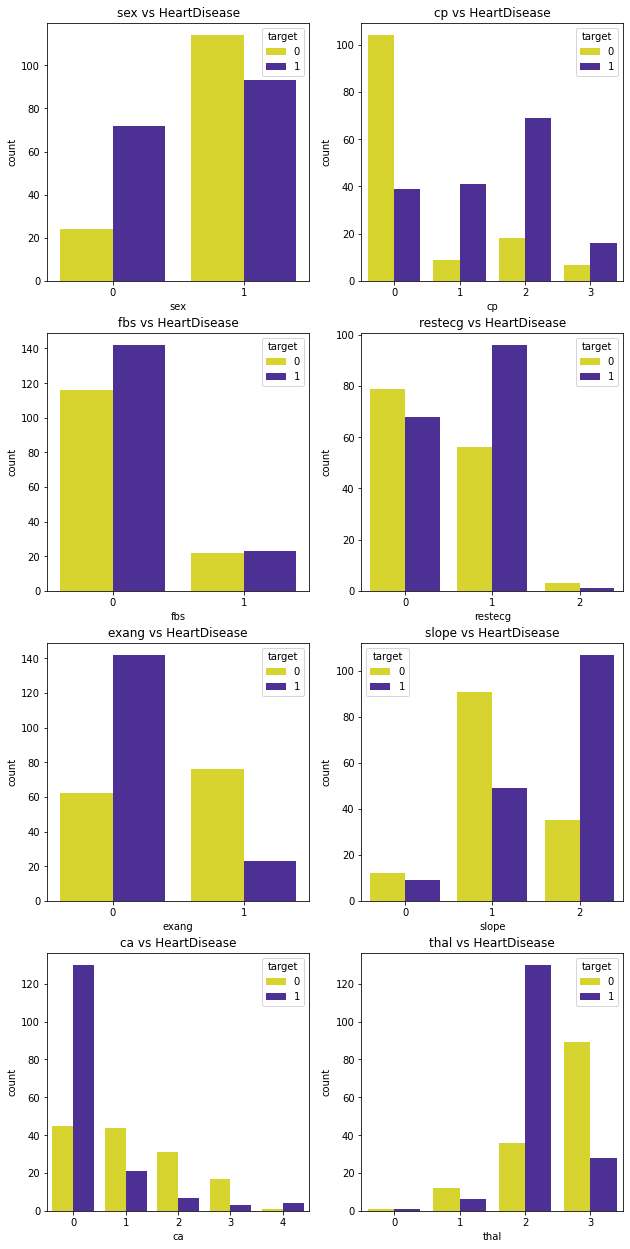

In [68]:
fig, ax = plt.subplots(nrows = 4,ncols = 2, gridspec_kw=dict(left=0.1, right=0.9,
                                        bottom=0.1, top=1.2),figsize = (10,15))
for i in range(len(categorical_features) - 1):
    plt.subplot(4,2,i+1)
    sns.countplot(categorical_features[i],data = data,hue = "target",palette = colors)
    title = categorical_features[i] + ' vs HeartDisease'
    plt.title(title);

- **Male** population has more heart disease patients than no heart disease patients. In the case of **Female** population, heart disease patients are less than no heart disease patients. 
- **ASY** type of chest pain boldly points towards major chances of heart disease.
- **Fasting Blood Sugar** is tricky! Patients diagnosed with Fasting Blood Sugar and no Fasting Blood Sugar have significant heart disease patients. 
- **RestingECG** does not present with a clear cut category that highlights heart disease patients. All the 3 values consist of high number of heart disease patients.
- **Exercise Induced Engina** definitely bumps the probability of being diagnosed with heart diseases.
- With the **Slope** values, **flat** slope displays a very high probability of being diagnosed with heart disease. **Down** also shows the same output but in very few data points. 

### Categorical Features vs Positive Heart Disease Cases :

In [14]:
sex = data[data['target'] == 1]['sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = data[data['target'] == 1]['cp'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = data[data['target'] == 1]['fbs'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = data[data['target'] == 1]['restecg'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = data[data['target'] == 1]['exang'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = data[data['target'] == 1]['slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

ca = data[data['target'] == 1]['ca'].value_counts()
ca = [ca[0] / sum(ca) * 100,ca[1] / sum(ca) * 100,ca[2] / sum(ca) * 100,ca[3] / sum(ca) * 100,ca[4] / sum(ca) * 100]

thal = data[data['target'] == 1]['thal'].value_counts()
thal = [thal[0] / sum(thal) * 100,thal[1] / sum(thal) * 100,thal[2] / sum(thal) * 100,thal[3] / sum(thal) * 100]

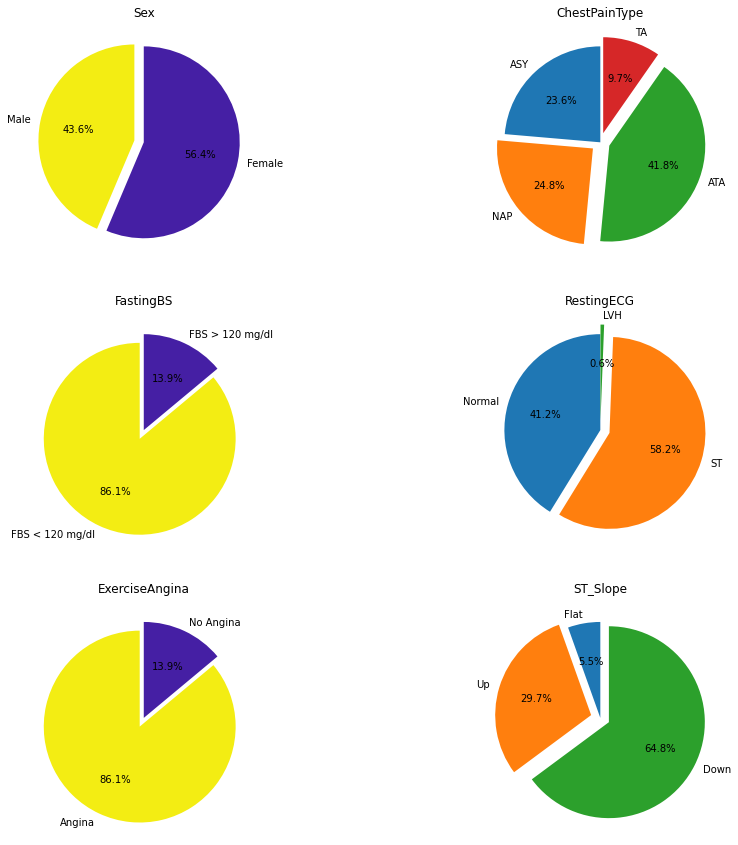

In [163]:
ax,fig = plt.subplots(nrows = 4,ncols = 2,figsize = (15,15))
colors = ['#F3ED13','#451FA4']

plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors)
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1))
plt.title('ChestPainType');

plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors)
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1))
plt.title('RestingECG');

plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors)
plt.title('ExerciseAngina');

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1))
plt.title('ST_Slope');

### Numerical Features vs Target Variable (HeartDisease) :

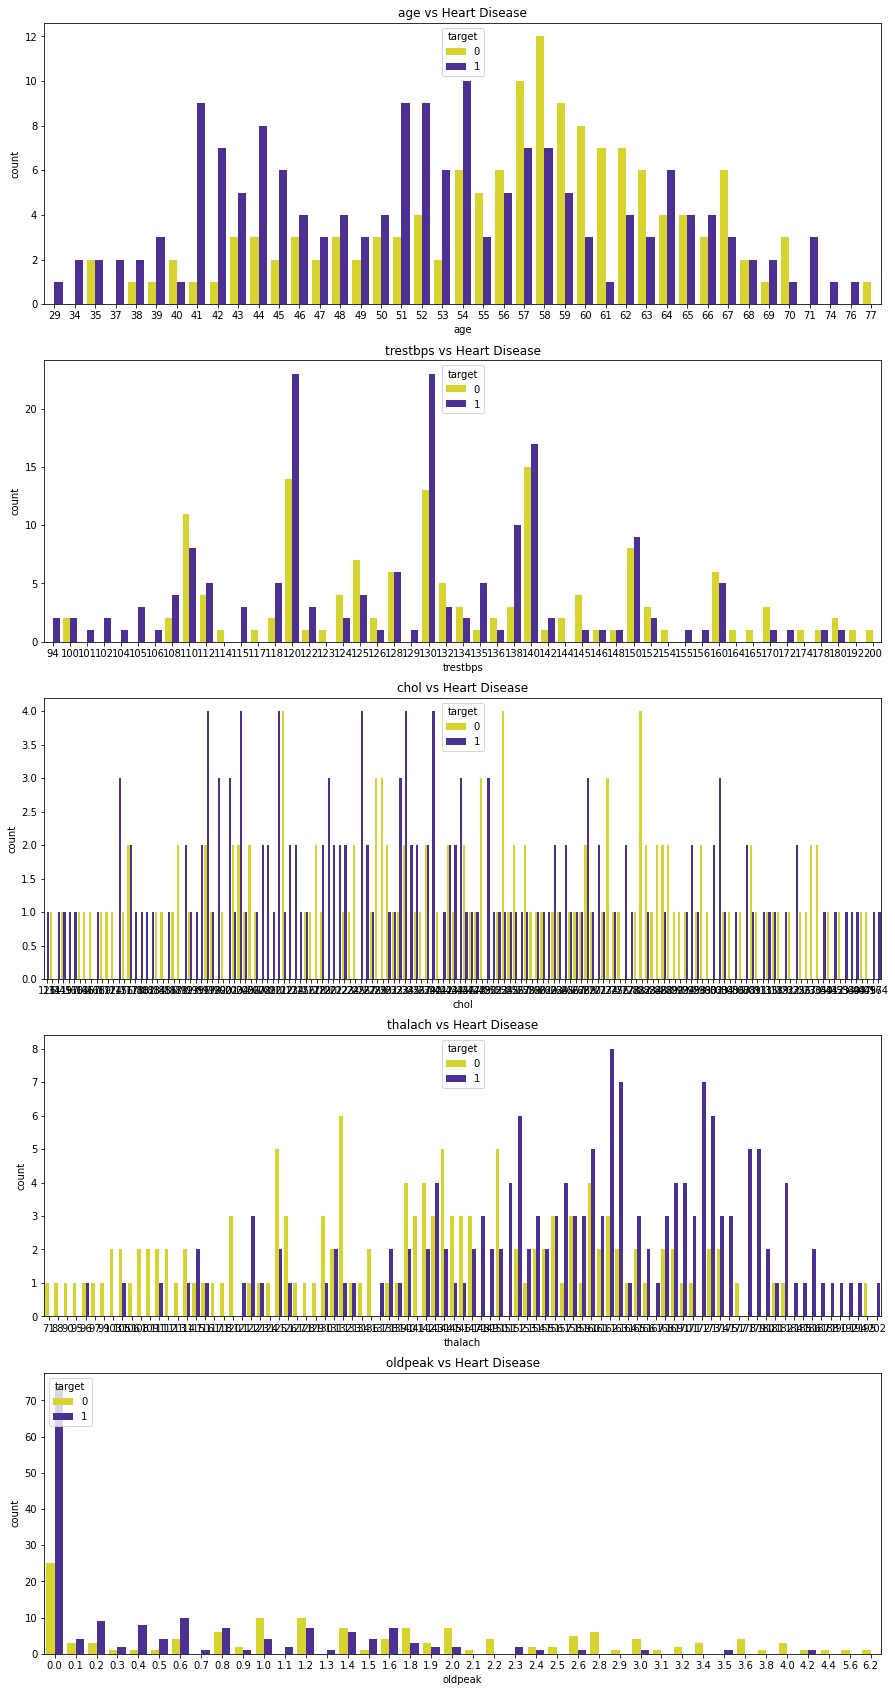

In [15]:
fig, ax = plt.subplots(nrows = 5,ncols = 1,figsize = (15,30))
colors = ['#F3ED13','#451FA4']
for i in range(len(numerical_features)):
    plt.subplot(5,1,i+1)
    sns.countplot(numerical_features[i],data = data,hue = "target",palette = colors)
    title = numerical_features[i] + ' vs Heart Disease'
    plt.title(title);

- Because of too many unique data points in the above features, it is difficult to gain any type of insight. Thus, we will convert these numerical features,except age, into categorical features for understandable visualization and gaining insights purposes. 
- Thus, we scale the individual values of these features. This brings the varied data points to a constant value that represents a range of values.
- Here, we divide the data points of the numerical features by 5 or 10 and assign its quotient value as the representative constant for that data point. The scaling constants of 5 & 10 are decided by looking into the data & intuition. 

In [16]:
data['trestbps_Group'] = [ int(i / 5) for i in data['trestbps']]
data['chol_Group'] = [ int(i / 10) for i in data['chol']]
data['thalach_Group'] = [ int(i / 5) for i in data['thalach']]
data['oldpeak_Group'] = [ int( (i*10) / 5) for i in data['oldpeak']]

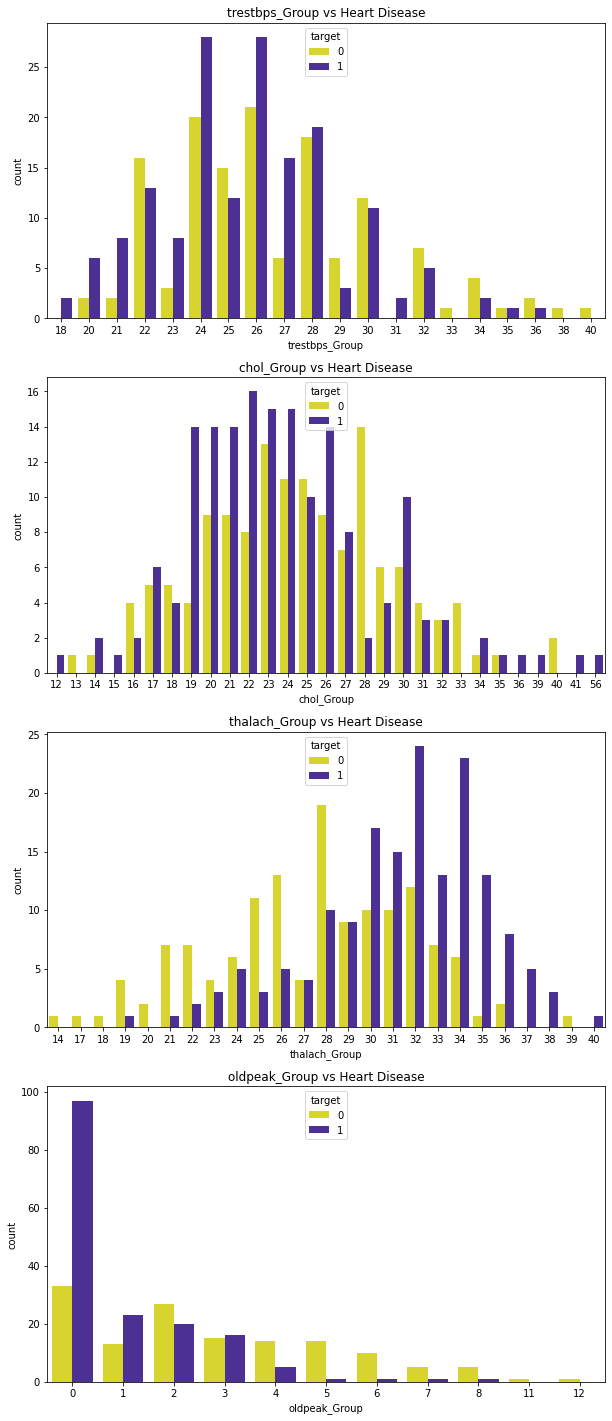

In [17]:
fig, ax = plt.subplots(nrows = 4,ncols = 1,figsize = (10,25))
colors = ['#F3ED13','#451FA4']
group_numerical_features = [i + '_Group' for i in numerical_features[1:]]
for i in range(len(group_numerical_features)):
    plt.subplot(4,1,i+1)
    sns.countplot(group_numerical_features[i],data = data,hue = "target",palette = colors)
    title = group_numerical_features[i] + ' vs Heart Disease'
    plt.title(title);

### Numerical features vs Categorical features w.r.t Target variable(HeartDisease) :

#### Sex vs Numerical Features :

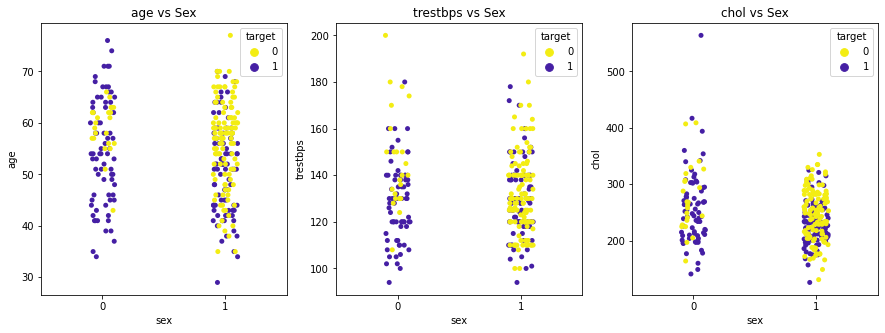

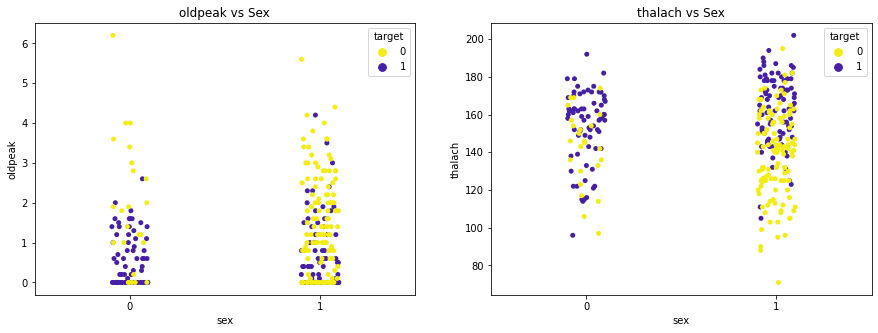

In [18]:
colors = ['#F3ED13','#451FA4']
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'sex',y = numerical_features[i],data = data,hue = 'target',palette = colors);
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'sex',y = numerical_features[i],data = data,hue = 'target',palette = colors);
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title);

- **Male** population displays heart diseases at near about all the values of the numerical features. Above the age of 50, positive old peak values and maximum heart rate below 140, heart diseases in male population become dense.
- **Female** population data points are very less as compared to **male** population data points. Hence, we cannot point to specific ranges or values that display cases of heart diseases. 

#### ChestPainType vs Numerical Features :

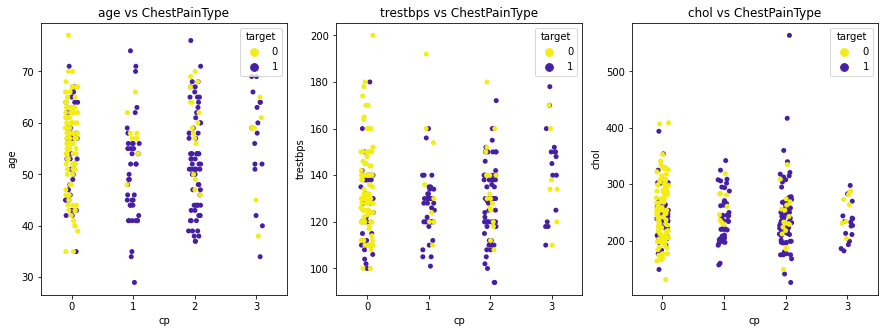

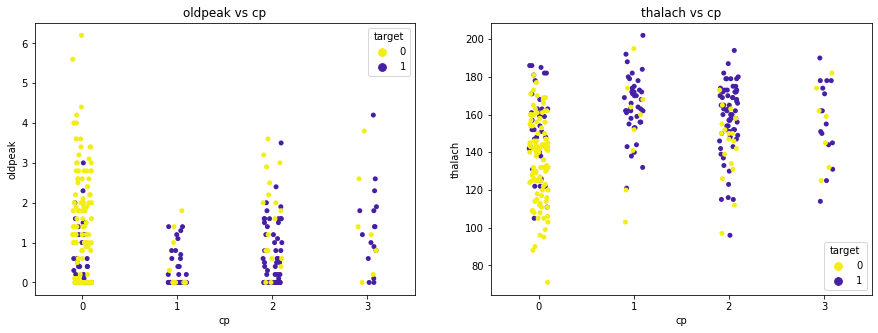

In [19]:
colors = ['#F3ED13','#451FA4']
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'cp',y = numerical_features[i],data = data,hue = 'target',palette = colors);
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'cp',y = numerical_features[i],data = data,hue = 'target',palette = colors);
    title = numerical_features[i] + ' vs cp' 
    plt.title(title);

#### FastingBS vs Numerical features :

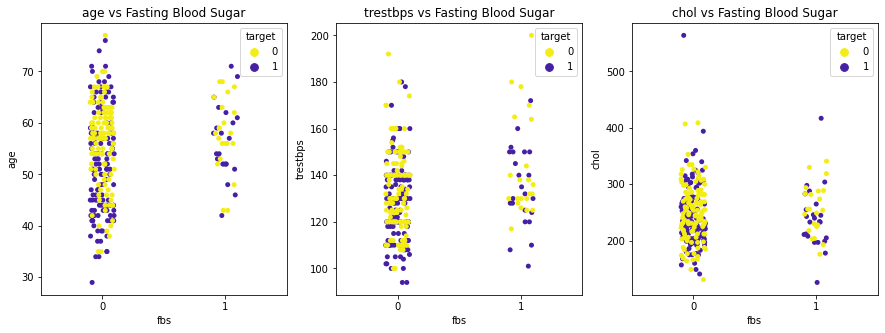

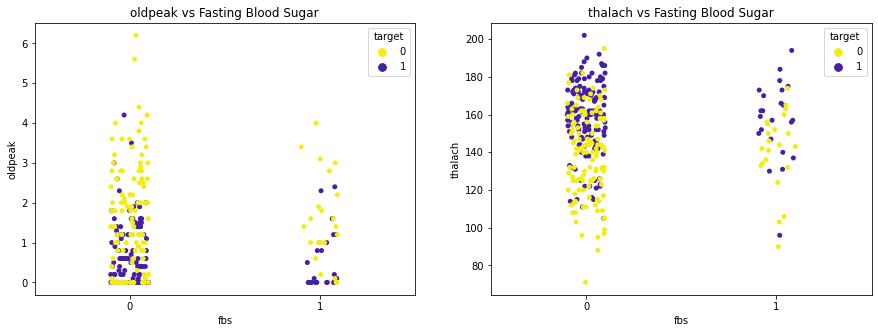

In [169]:
colors = ['#F3ED13','#451FA4']
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'fbs',y = numerical_features[i],data = data,hue = 'target',palette = colors);
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'fbs',y = numerical_features[i],data = data,hue = 'target',palette = colors);
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title);

- Above the **age** 50, heart diseases are found throughout the data irrespective of the patient being diagnosed with Fasting Blood Sugar or not.
- **Fasting Blood Sugar** with **Resting BP** over 100 has displayed more cases of heart diseases than patients with no fasting blood sugar.
- **Cholesterol** with **Fasting Blood Sugar** does not seem to have an effect in understanding reason behind heart diseases.
- Patients that have not been found positive with **Fasting Blood Sugar** but have maximum heart rate below 130 are more prone to heart diseases.

#### RestingECG vs Numerical Features :

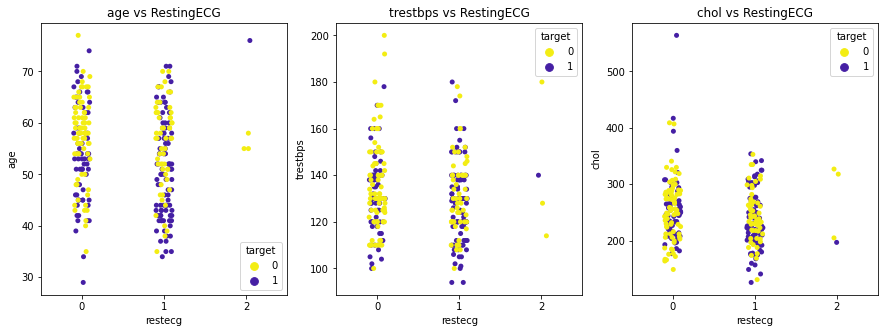

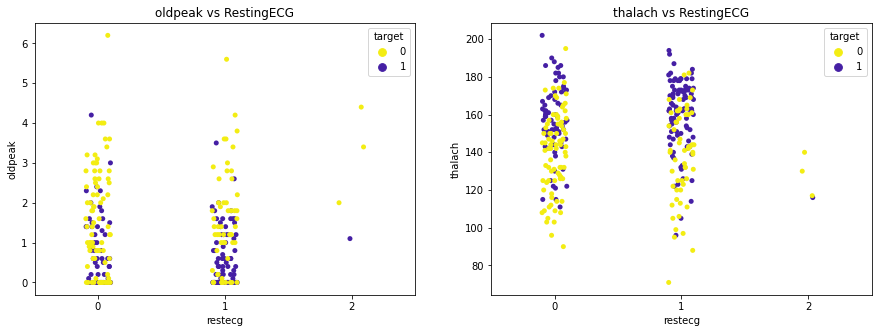

In [173]:
colors = ['#F3ED13','#451FA4']
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'restecg',y = numerical_features[i],data = data,hue = 'target',palette = colors);
    title = numerical_features[i] + ' vs RestingECG' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'restecg',y = numerical_features[i],data = data,hue = 'target',palette = colors);
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title);

- Heart diseases with **RestingECG** values of **Normal**, **ST** and **LVH** are detected starting from 30,40 & 40 respectively. Patients above the age of 50 are more prone than anyother ages irrespective of **RestingECG** values.
- Heart diseases are found consistently throughout any values of **RestingBP** and **RestingECG**.
- **Cholesterol** values between 200 - 300 coupled with **ST** value of **RestingECG** display a patch of patients suffering from heart diseases. 
- For **maximum Heart Rate** values, heart diseases are detected in dense below 140 points and **Normal** RestingECG. **ST** & **LVH** throughout the maximum heart rate values display heart disease cases.

#### ExerciseAngina vs Numerical Features :

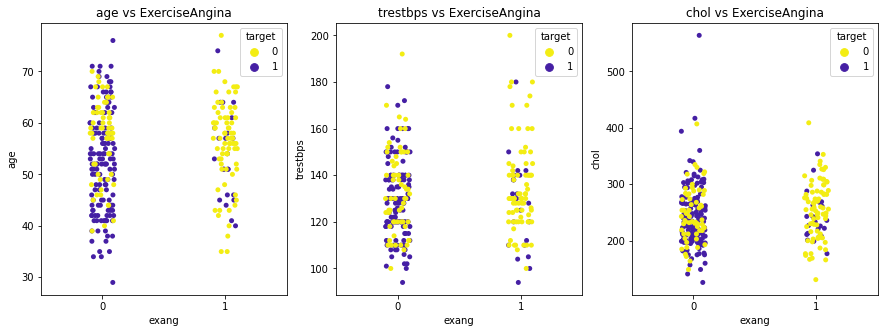

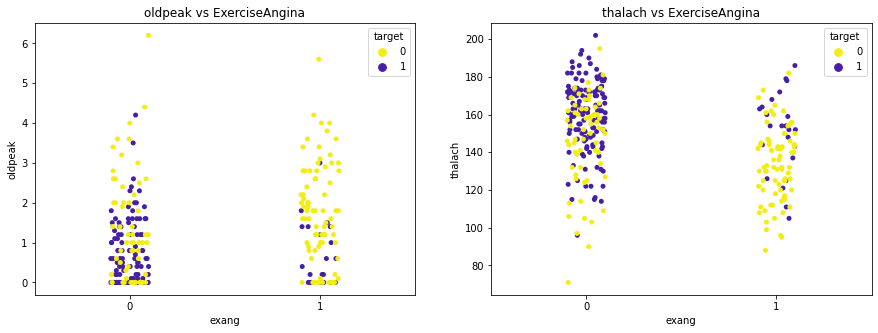

In [174]:
colors = ['#F3ED13','#451FA4']
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'exang',y = numerical_features[i],data = data,hue = 'target',palette = colors);
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'exang',y = numerical_features[i],data = data,hue = 'target',palette = colors);
    title = numerical_features[i] + ' vs ExerciseAngina' 
    plt.title(title);

- A crsytal clear observation can be made about the relationship between **heart disease** case and **Exercise induced Angina**. A positive correlation between the 2 features can be concluded throughout all the numerical features. 

#### Slope vs Numerical Features :

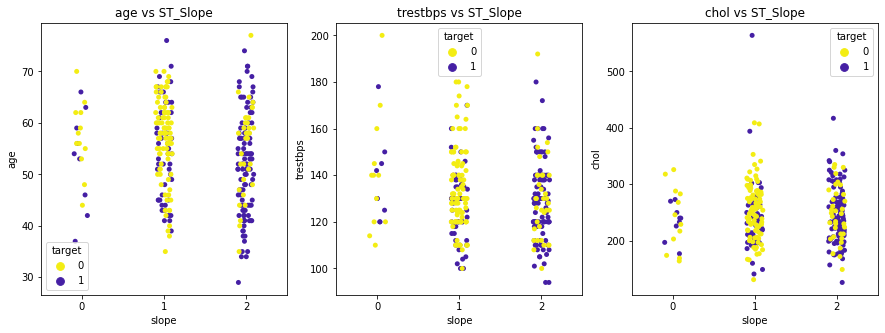

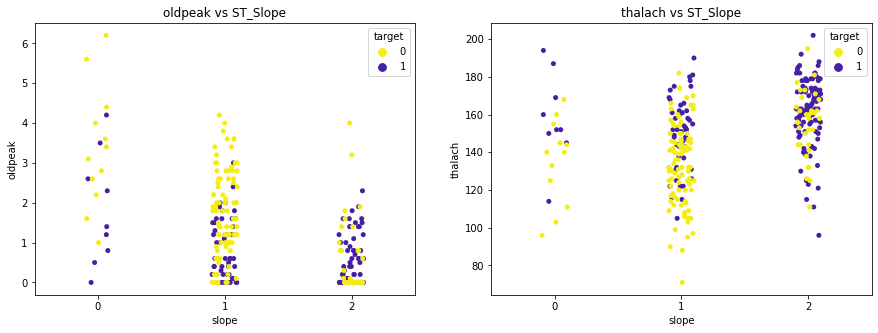

In [175]:
colors = ['#F3ED13','#451FA4']
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'slope',y = numerical_features[i],data = data,hue = 'target',palette = colors);
    title = numerical_features[i] + ' vs ST_Slope' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'slope',y = numerical_features[i],data = data,hue = 'target',palette = colors);
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title);

- Another crystal clear positive observation can be made about the positive correlation between **Slope** value and **Heart Disease** cases. 
- **Flat**, **Down** and **Up** in that order display high, middle and low probability of being diagnosed with heart diseases respectively.

### Numerical features vs Numerical features w.r.t Target variable(HeartDisease) :

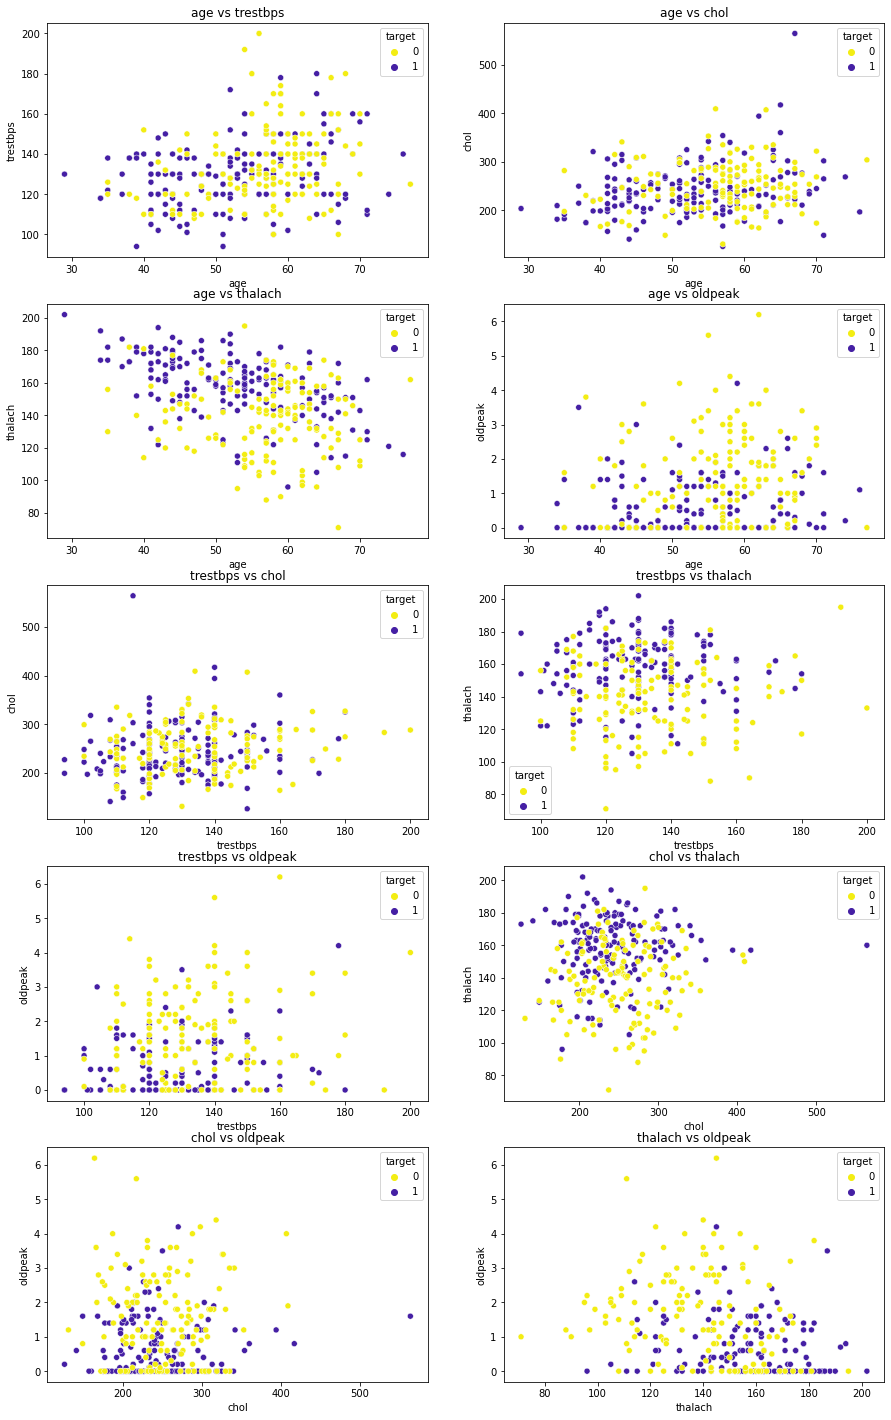

In [70]:
a = 0
fig,ax = plt.subplots(nrows = 5,ncols = 3,figsize = (15,25))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(5,2,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = data,hue = 'target',palette = colors);
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

# <center>Summary of EDA</center>

### Order / Values of features for positive cases of heart disease :

- **Categorical Features (Order) :**
    - Sex : Male > Female
    - ChestPainType : ASY > NAP > ATA > TA
    - FastingBS : ( FBS < 120 mg/dl ) > ( FBS > 120 mg/dl)
    - RestingECG : Normal > ST > LVH
    - ExerciseAngina : Angina > No Angina
    - ST_Slope : Flat > Up > Down
 
- **Numerical Features (Range) :**
    - Age : 50+
    - RestingBP : 95 - 170 
    - Cholesterol : 160 - 340
    - Oldpeak : 0 - 4
    
    
**Now that we have understood the typical values of the features, we move on to the next step where we select the appropriate features for modeling!**

# <center>Feature Engineering</center>

### Data Scaling :

In [20]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['oldpeak'] = mms.fit_transform(df1[['oldpeak']])
df1['age'] = ss.fit_transform(df1[['age']])
df1['trestbps'] = ss.fit_transform(df1[['trestbps']])
df1['chol'] = ss.fit_transform(df1[['chol']])
df1['thalach'] = ss.fit_transform(df1[['thalach']])
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.95,1,3,0.76,-0.26,3,0,0.02,0,0.37,0,0,1,1
1,-1.92,1,2,-0.09,0.07,2,1,1.63,0,0.56,0,0,2,1
2,-1.47,0,1,-0.09,-0.82,1,0,0.98,0,0.23,2,0,2,1
3,0.18,1,1,-0.66,-0.20,1,1,1.24,0,0.13,2,0,2,1
4,0.29,0,0,-0.66,2.08,0,1,0.58,1,0.10,2,0,2,1


- Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

**Eg :** Age = Years; FastingBS = mg / dl 

- We have 2 options for data scaling : 1) **Normalization** 2) **Standardization**. As most of the algorithms assume the data to be normally (Gaussian) distributed, **Normalization** is done for features whose data does not display normal distribution and **standardization** is carried out for features that are normally distributed where their values are huge or very small as compared to other features.


- **Normalization** : **Oldpeak** feature is normalized as it had displayed a right skewed data distribution.
- **Standardizarion** : **Age**, **RestingBP**, **Cholesterol** and **MaxHR** features are scaled down because these features are normally distributed.

### Correlation Matrix :

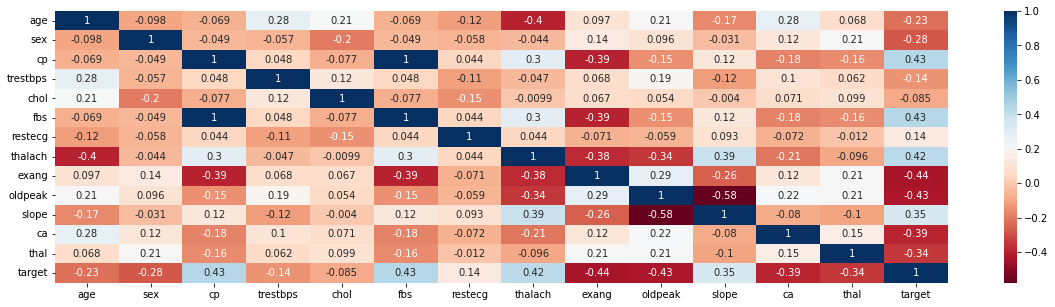

In [179]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = 'RdBu',annot = True);

- It is a huge matrix with too many features. We will check the correlation only with respect to **HeartDisease**. 

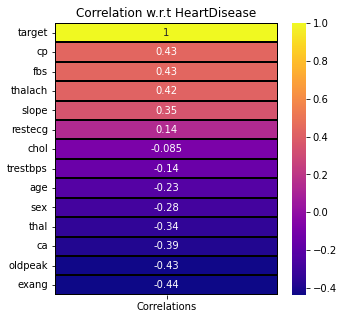

In [180]:
corr = df1.corrwith(df1['target']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = 'plasma',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

- Except for **RestingBP** and **RestingECG**, everyone displays a positive or negative relationship with **HeartDisease**.

### Feature Selection for Categorical Features :

#### Chi Squared Test :

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

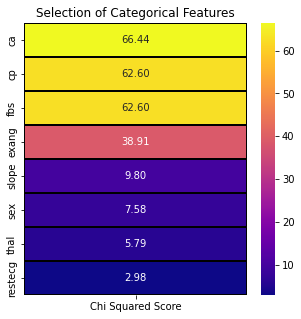

In [62]:
features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = 'plasma',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

- Except **RestingECG**, all the remaining categorical features are pretty important for predicting heart diseases.

### Feature Selection for Numerical Features :

#### ANOVA Test :

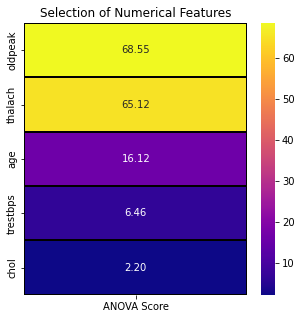

In [63]:
from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = 'plasma',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

- We will leave out **RestingBP** from the modeling part and take the remaining features.

# <center>Modeling</center>

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [23]:
features = df1[df1.columns.drop(['target','trestbps','restecg', 'chol'])].values
target = df1['target'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

- Selecting the features from the above conducted tests and splitting the data into **80 - 20 train - test** groups.

In [24]:
def model(classifier):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

#### 1] Logistic Regression :

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

Accuracy :  86.89%
Cross Validation Score :  88.63%
ROC_AUC Score :  87.34%


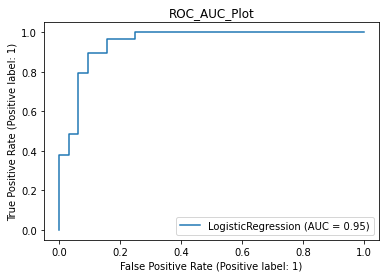

CPU times: total: 297 ms
Wall time: 279 ms


In [37]:
%%time
model(classifier_lr)

              precision    recall  f1-score   support

           0       0.96      0.78      0.86        32
           1       0.80      0.97      0.88        29

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



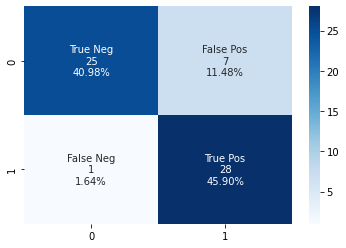

In [35]:
model_evaluation(classifier_lr)

#### 2] Support Vector Classifier :

In [38]:
from sklearn.svm import SVC

In [39]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

Accuracy :  90.16%
Cross Validation Score :  88.03%
ROC_AUC Score :  90.46%


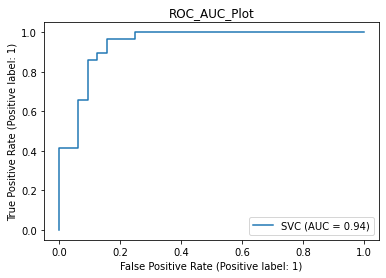

CPU times: total: 172 ms
Wall time: 169 ms


In [40]:
%%time
model(classifier_svc)

              precision    recall  f1-score   support

           0       0.96      0.84      0.90        32
           1       0.85      0.97      0.90        29

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



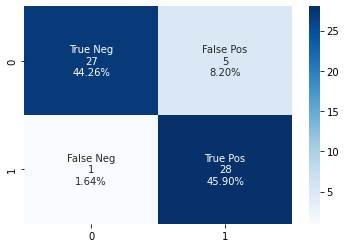

In [74]:
model_evaluation(classifier_svc)

#### 3] Decision Tree Classifier :

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 6,min_samples_leaf = 1)

Accuracy :  81.97%
Cross Validation Score :  77.00%
ROC_AUC Score :  82.17%


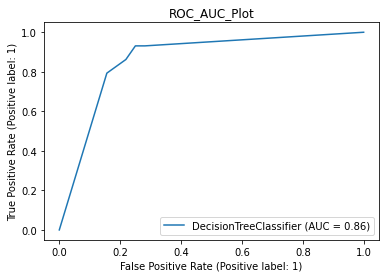

CPU times: total: 172 ms
Wall time: 170 ms


In [43]:
%%time
model(classifier_dt)

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        32
           1       0.75      0.72      0.74        29

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



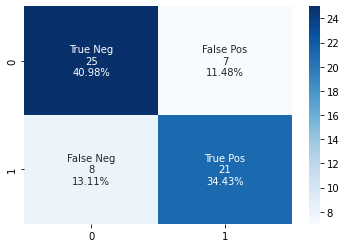

In [78]:
model_evaluation(classifier_dt)

#### 4] Random Forest Classifier :

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Accuracy :  88.52%
Cross Validation Score :  89.64%
ROC_AUC Score :  88.90%


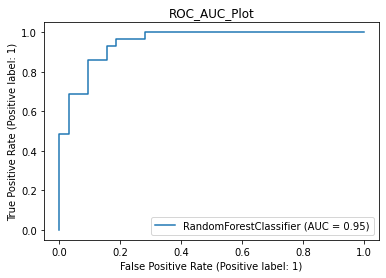

CPU times: total: 3.2 s
Wall time: 3.21 s


In [46]:
%%time
model(classifier_rf)

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        32
           1       0.82      0.97      0.89        29

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.88        61



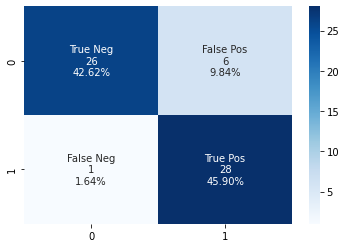

In [86]:
model_evaluation(classifier_rf)

#### 5] K-nearest Neighbors Classifier :

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 6,p = 1)

Accuracy :  88.52%
Cross Validation Score :  86.98%
ROC_AUC Score :  88.90%


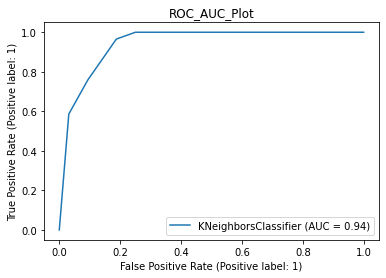

CPU times: total: 188 ms
Wall time: 180 ms


In [49]:
%%time
model(classifier_knn)

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        32
           1       0.82      0.97      0.89        29

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.88        61



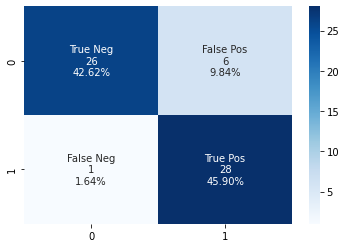

In [106]:
model_evaluation(classifier_knn)

#### 6] BernoulliNB Classifier :

In [50]:
from sklearn.naive_bayes import BernoulliNB

In [51]:
NB_model = BernoulliNB()

Accuracy :  81.97%
Cross Validation Score :  86.58%
ROC_AUC Score :  82.17%


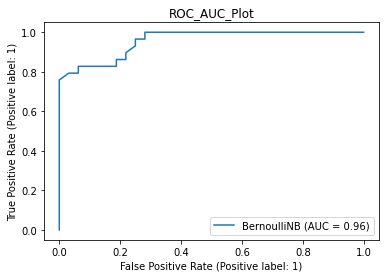

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.78      0.86      0.82        29

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

CPU times: total: 219 ms
Wall time: 224 ms


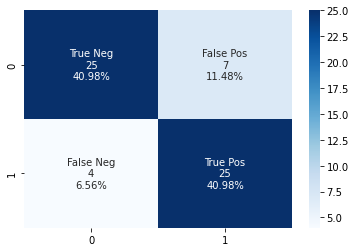

In [52]:
%%time
model(NB_model)
model_evaluation(NB_model)

#### 7] GradientBoostingClassifier :

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier()

Accuracy :  86.89%
Cross Validation Score :  87.67%
ROC_AUC Score :  87.34%


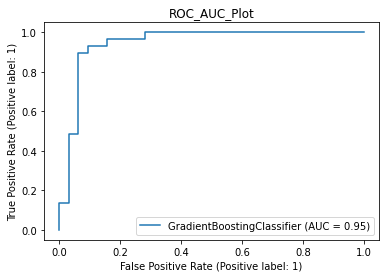

              precision    recall  f1-score   support

           0       0.96      0.78      0.86        32
           1       0.80      0.97      0.88        29

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

CPU times: total: 2.27 s
Wall time: 2.26 s


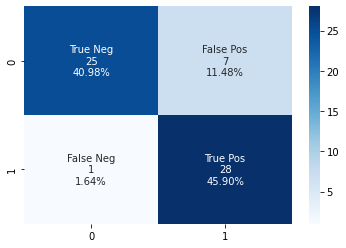

In [56]:
%%time
model(GB_model)
model_evaluation(GB_model)

#### 8] XGBClassifier :

In [57]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()

Accuracy :  85.25%
Cross Validation Score :  86.28%
ROC_AUC Score :  85.78%


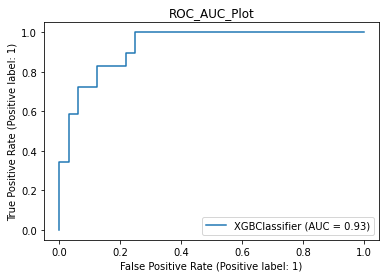

CPU times: total: 25.3 s
Wall time: 2.32 s


In [59]:
%%time
model(XGB_model)

              precision    recall  f1-score   support

           0       0.96      0.75      0.84        32
           1       0.78      0.97      0.86        29

    accuracy                           0.85        61
   macro avg       0.87      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



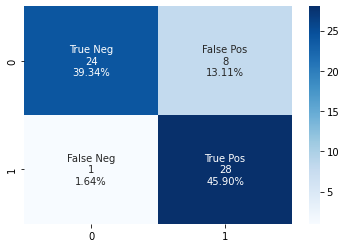

In [60]:
model_evaluation(XGB_model)

# <center>Conclusion</center>


- Subject matter experts, in this case doctors or nurses, can be assisted by providing insights that enables them to take the next line of action.


- For feature engineering, it might feel confusing about the order of the processes. In this case, data scaling was executed before the feature selection test.


- Visualization is key. It makes the data talkative. Displaying the present information and results of any tests or output through visualization becomes crucial as it makes the understanding easy.
- Overall the algorithm performances are good such as SVM gives the highest accuracy 0f 90% and also other models attained accuracy of more than 80%.